# Represnting Return with Pandas

Lets take a set of prices as a list

In [7]:
prices_a=[8.55,8.79,8.95]

To generate a Sequence of returns, we need to first create a list of all prices except the first

In [8]:
prices_a[1:]

[8.79, 8.95]

We then generate a sequence of prices of everything except the last one

In [3]:
prices_a[:-1]

[8.55, 8.79]

The Sequences so generated needs to be divided but to do that we would need numpy to generate a numpy Array

In [9]:
import numpy as np

In [10]:
prices_a=np.array([8.55,8.79,8.95])

In [11]:
(prices_a[1:]/prices_a[:-1])-1

array([0.02807018, 0.0182025 ])

So we could get return analysed this way. However this seemed a bit tedious and next we explore Pandas to generate returns on prices

We import Pandas and then create a dataframe of prices using the dictionary structure which is a sequence of keys and values

In [12]:
import pandas as pd

In [13]:
prices=pd.DataFrame({"Blue":[8.7,8.91,8.71,8.43,8.73]
                     ,
                    "Orange":[10.66,11.08,10.71,11.59,12.11]
                    })

In [14]:
prices

,Blue,Orange
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


So now we have a nice dataframe in place representing two price series

In [15]:
prices.iloc[1:]/prices.iloc[:-1]

,Blue,Orange
0,NaN,NaN
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,NaN,NaN


iloc operator on the dataframe references the index location and the slicing in the numerator takes the series except the first price and the denominator takes everything except the last price.

However the results do not look exactly what we were looking for because of the way iloc works and lets see some other methods.

In [16]:
prices.iloc[1:].values/prices.iloc[:-1]-1

,Blue,Orange
0,0.024138,0.039400
1,-0.022447,-0.033394
2,-0.032147,0.082166
3,0.035587,0.044866


This was Method 1. Now lets see another way of generating the return

In [14]:
prices.shift(1)

,Blue,Orange
0,NaN,NaN
1,8.70,10.66
2,8.91,11.08
3,8.71,10.71
4,8.43,11.59


In [15]:
prices/prices.shift(1)-1

,Blue,Orange
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


Now the inbuilt method using pct_change

In [17]:
prices.pct_change()

,Blue,Orange
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


We will now import in a csv file containing more prices and try to compute return and plot some graphs

In [18]:
prices=pd.read_csv("sample_prices.csv")

In [19]:
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [20]:
returns=prices.pct_change()

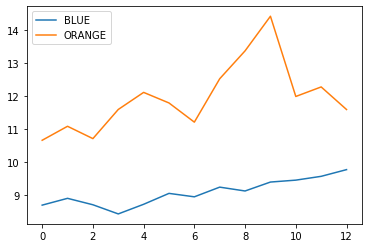

In [21]:
prices.plot()

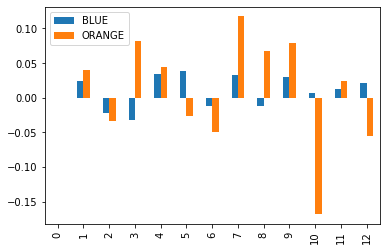

In [22]:
returns.plot.bar()

Quite evidently from the plot we see that the Orange series is highly volatile in terms of the Returns provided. Lets check the Standard deviation if the above observation is right

In [23]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [24]:
returns.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

Quite Surprising to see the mean is same for both price series though the Standard deviations are miles apart from each other

#### Compounded return

In [23]:
np.prod(returns+1)-1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

### Annualization

In [24]:
"""Monthly return denoted as rm"""
rm=0.01
(1+rm)**12

1.1268250301319698

In [26]:
"""Daily return denoted as rd"""
rd=.0001
(1+rd)**252

1.0255189119876946